# How to isolate alpha with principal component analysis

We will show you how to use principal component analysis (PCA) to analyze a portfolio of stocks.

PCA is used widely in data science. It’s a way to reduce the number of dimensions in a data set. In a stock portfolio, a dimension might be a column of returns for one of the stocks. In a portfolio of 100 stocks, there are 100 dimensions. PCA converts those 100 dimensions into the few that explain the most variance in the data. In other words, the dimensions hold the most information about the data.

Quants use PCA in many ways

PCA isolates the statistical return drivers of a portfolio. These drivers are called “alpha factors” (or just factors) because they create returns that are not explained by a benchmark. (In a previous newsletter issue, you learned how to hedge beta to get exposure to alpha.) Quants use factors in trading strategies. First, they isolate the components. Then they buy the stocks with the largest exposure to a factor and sell the stocks with the smallest exposure to a factor. Today you’ll learn how to do this in Python.

The steps are:

1. Get stock data
2. Fit a PCA model
3. Visualize the components
4. Isolate the alpha factors

In [5]:
# Step 1: Get the data

# Start by importing the libraries. sklearn is a package used to build statistical models for data analysis.

import yfinance as yf

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
# Next, build a portfolio. You can pick any stocks you want.

symbols = [
    'IBM',
    'MSFT',
    'META',
    'INTC',
    'NEM',
    'AU',
    'AEM',
    'GFI'
]
data = yf.download(symbols, start="2020-01-01", end="2022-11-30")
portfolio_returns = data['Adj Close'].pct_change().dropna()
data.head()

[*********************100%***********************]  8 of 8 completed


Adj Close                                                          \
                  AEM         AU       GFI         IBM       INTC        META   
Date                                                                            
2020-01-02  56.119663  21.246773  5.882495  110.232513  54.760349  209.779999   
2020-01-03  56.221172  21.209314  5.837862  109.353386  54.094299  208.669998   
2020-01-06  56.285767  21.274862  5.855715  109.158020  53.941277  212.600006   
2020-01-07  56.737980  21.059492  5.837862  109.231270  53.041206  213.059998   
2020-01-08  54.643066  20.169918  5.543292  110.142967  53.077217  215.220001   

                                       Close             ...        Open  \
                  MSFT        NEM        AEM         AU  ...        MSFT   
Date                                                     ...               
2020-01-02  155.761795  38.958557  60.810001  22.690001  ...  158.779999   
2020-01-03  153.822311  38.607018  60.919998  22.650000  ...  158.320007   
2020-01-06  154.219910  38.994617  60.990002  22.719999  ...  157.080002   
2020-01-07  152.813766  38.967571  61.480000  22.490000  ...  159.320007   
2020-01-08  155.247849  37.930962  59.209999  21.540001  ...  158.929993   

                        Volume                                                 \
                  NEM      AEM       AU      GFI      IBM      INTC      META   
Date                                                                            
2020-01-02  43.549999   925600  2343000  4083100  3293436  18056000  12077100   
2020-01-03  43.750000   967400  3018100  7443600  2482890  15293900  11188400   
2020-01-06  43.759998  1247700  3791400  4303200  2537073  17755200  17058900   
2020-01-07  43.160000  1095300  2927700  6276300  3232977  21876100  14912400   
2020-01-08  43.259998  1434400  4277600  6961100  4545916  23133500  13475000   

                                
                MSFT       NEM  
Date                            
2020-01-02  22622100   6287500  
2020-01-03  21116200   9148900  
2020-01-06  20813700  10416400  
2020-01-07  21634100   9378300  
2020-01-08  27746500   9455300  

[5 rows x 48 columns]

In [6]:
portfolio_returns

,AEM,AU,GFI,IBM,INTC,META,MSFT,NEM
Date,,,,,,,,
2020-01-03,0.001809,-0.001763,-0.007587,-0.007975,-0.012163,-0.005291,-0.012452,-0.009023
2020-01-06,0.001149,0.003091,0.003058,-0.001787,-0.002829,0.018834,0.002585,0.010040
2020-01-07,0.008034,-0.010123,-0.003049,0.000671,-0.016686,0.002164,-0.009118,-0.000694
2020-01-08,-0.036923,-0.042241,-0.050459,0.008346,0.000679,0.010138,0.015928,-0.026602
2020-01-09,-0.004053,-0.000928,-0.017713,0.010568,0.005596,0.014311,0.012493,-0.009981
...,...,...,...,...,...,...,...,...
2022-11-22,0.037373,0.055977,0.015038,0.016499,0.030408,0.014382,0.012311,0.025111
2022-11-23,0.013841,0.010491,0.024074,-0.002347,-0.005030,0.007179,0.010407,0.002601
2022-11-25,0.001205,-0.007650,-0.013562,-0.002555,-0.011122,-0.007395,-0.000364,-0.008649


In [12]:
# Step 2: Fit a PCA model

# sklearn makes it easy to fit a PCA model and get the components.

pca = PCA(n_components=3)
pca.fit(portfolio_returns)
# The n_components argument tells sklearn how many of the top components to return. Fit the model with the portfolio returns and the algorithm will look for the top three components that explain most of the variance in the returns.

pct = pca.explained_variance_ratio_
pca_components = pca.components_
# After you fit the model, grab the explained variance and components (remember the underscore).
pca_components

array([[ 0.37594618,  0.54951361,  0.64159953,  0.07896232,  0.09811405,
         0.12252729,  0.10081195,  0.32250877],
       [ 0.02793495,  0.12305951,  0.17653245, -0.2522266 , -0.53577053,
        -0.63526615, -0.4455763 ,  0.0119433 ],
       [ 0.12803137, -0.03725314, -0.16023179,  0.44073   ,  0.50608719,
        -0.67700434,  0.04718491,  0.21358249]])

(0.0, 100.0)

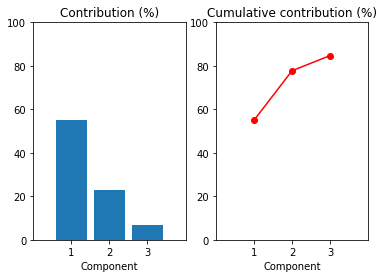

In [8]:
# Step 3: Visualize the components

# If the description of PCA is unclear, these charts should help.

cum_pct = np.cumsum(pct)
x = np.arange(1,len(pct)+1,1)

plt.subplot(1, 2, 1)
plt.bar(x, pct * 100, align="center")
plt.title('Contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

plt.subplot(1, 2, 2)
plt.plot(x, cum_pct * 100, 'ro-')
plt.title('Cumulative contribution (%)')
plt.xlabel('Component')
plt.xticks(x)
plt.xlim([0, 4])
plt.ylim([0, 100])

In [9]:
# Step 4: Isolate the alpha factors

# There are forces that move stock prices that we can’t see. These latent factors are picked up through PCA and isolated as the principal components. The overall stock market is usually a strong driver of returns. Macroeconomic forces like interest rates and the pandemic drive returns, too. PCA lets you isolate these statistical factors to get an idea of how much the portfolio’s returns come from these unobserved features.

X = np.asarray(portfolio_returns)

factor_returns = X.dot(pca_components.T)

factor_returns = pd.DataFrame(
    columns=["f1", "f2", "f3"],
    index=portfolio_returns.index,
    data=factor_returns
)

factor_returns.head()

,f1,f2,f3
Date,,,
2020-01-03,-0.011794,0.015824,-0.007090
2020-01-06,0.009480,-0.010078,-0.013161
2020-01-07,-0.006960,0.009891,-0.008298
2020-01-08,-0.074473,-0.031461,-0.002840
2020-01-09,-0.012221,-0.023795,-0.001387


<AxesSubplot:>

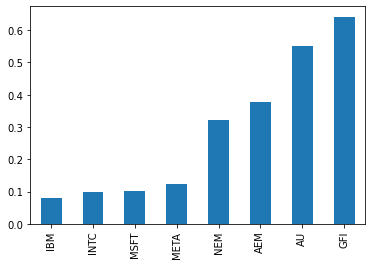

In [10]:
factor_exposures = pd.DataFrame(
    index=["f1", "f2", "f3"],
    columns=portfolio_returns.columns,
    data = pca_components
).T

factor_exposures.f1.sort_values().plot.bar()

In [11]:
factor_exposures

,f1,f2,f3
AEM,0.375946,0.027935,0.128031
AU,0.549514,0.123060,-0.037253
GFI,0.641600,0.176532,-0.160232
IBM,0.078962,-0.252227,0.440730
INTC,0.098114,-0.535771,0.506087
META,0.122527,-0.635266,-0.677004
MSFT,0.100812,-0.445576,0.047185
NEM,0.322509,0.011943,0.213582


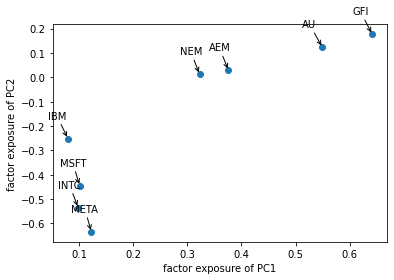

In [14]:
# Another great way to visualize this is with a scatter plot.

labels = factor_exposures.index
data = factor_exposures.values
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y),
        xytext=(-20, 20),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))


You can see how the stocks are driven by the first two principal components. Gold stocks were largely driven by factor one and tech stocks were negatively driven by factor two.

This analysis covered the time period during covid. Gold stocks were bid up strongly as a hedge against inflation and uncertainty. You might consider the first factor as a “covid factor” representing uncertainty across the market. Tech stocks crashed as worries of economic health began.